In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
# 28 * 28 images of hand-written digit 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Unpacking the data
# print(x_train[0])

# plt.imshow(x_train[0])
# plt.imshow(x_train[0], cmap = plt.cm.binary) # To show the original greyscale image
# plt.show()

x_train = tf.keras.utils.normalize(x_train, axis = 1)  # This brings down the value of the tensors from a range of 0-255 to 0-1
x_test = tf.keras.utils.normalize(x_test, axis = 1)    # This provides a better accuracy for the model (40 % without normalization
                                                       #                                                97 % with normalization)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 5)
# Check for overfitment
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.3126 - acc: 0.9093
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.1374 - acc: 0.9583
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0959 - acc: 0.9695
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0744 - acc: 0.9763
Epoch 5/5
10000/10000 [==============================] - 1s 56us/step
0.09281862094486132 0.9712


In [42]:
model.save('num_reader.model')

In [43]:
new_model = tf.keras.models.load_model('num_reader.model')
predictions = new_model.predict([x_test])
print(predictions)

[[9.3450456e-09 8.6497562e-07 2.6949679e-06 ... 9.9263918e-01
  5.1489525e-07 9.3258612e-05]
 [2.7379151e-12 1.0031432e-04 9.9989581e-01 ... 1.7066576e-08
  2.0081417e-10 1.3632218e-16]
 [3.2941241e-08 9.9927741e-01 7.3149727e-06 ... 1.9662792e-05
  5.9220300e-04 2.3364832e-06]
 ...
 [1.0743837e-09 4.0216784e-07 1.7420105e-07 ... 4.9371814e-05
  8.7785418e-07 8.0848360e-05]
 [2.4905501e-07 1.3901702e-07 3.0149497e-08 ... 5.7380493e-07
  2.4851693e-03 9.3616386e-09]
 [3.2036189e-06 8.2658973e-09 5.0336610e-09 ... 3.1231934e-10
  1.5632095e-08 6.8784147e-09]]


6


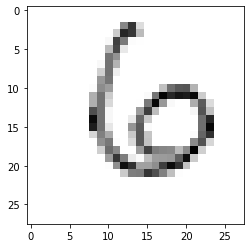

In [50]:
print(np.argmax(predictions[100]))
plt.imshow(x_test[100], cmap = plt.cm.binary)
plt.show()